In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/projetdm-data/TRAIN.CSV
/kaggle/input/projetdm-data/TEST.CSV


In [9]:
train_data = "/kaggle/input/projetdm-data/TRAIN.CSV"
### Loop the data lines
with open(train_data, 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]
df_train = pd.read_csv(train_data,header=None, delimiter=",", names=column_names, low_memory=False).astype(str)

In [31]:
import re
hotkey_actions_to_count = ["0","1","2"]
hotkeys_to_count = ["0","1","2","3","4","5","6","7","8","9"]

In [41]:
def extract_features(input_data):
    output_data = []
    for row in input_data:
        count_hotkeys = [0] * len(hotkeys_to_count) * len(hotkey_actions_to_count)
        new_row = []
        new_row.append(row[0]) # url of player
        new_row.append(row[1]) # race
        game_length = 0
        count_action = 0
        
        for action in row[2:]:
            # look for time cell, begin with "t"
            if isinstance(action, str):
                match = re.match(r't(\d+)', action)
                if match:
                    time = int(match.group(1))
                    game_length = time

            # count each hotkey action
            for i, hotkey in enumerate(hotkeys_to_count):
                for j, hotkey_action in enumerate(hotkey_actions_to_count):
                    if (action.startswith('hotkey') and action[-2] == hotkey and action.endswith(hotkey_action)):
                        count_hotkeys[i * len(hotkey_actions_to_count) + j] += 1
            
            if (action == 's' or action == 'Base' or action == 'SingleMineral'):
                count_action += 1
            
        # There may be more action after the last time value
        # We add an artificial 2 second to the game length
        # This help avoid some game length being 0 as well
        game_length += 2
            
        # Frenquency of base, mineral, other action
        count_action /= game_length
        new_row.append(count_action)
        
        # Calculate the frequency of hotkey
        for i in range(len(hotkeys_to_count)):
            for j in range(len(hotkey_actions_to_count)):
                count_hotkeys[i * len(hotkey_actions_to_count) + j] /= game_length
        
        for i in range(len(count_hotkeys)):
            new_row.append(count_hotkeys[i])
        
        # append the extracted feature
        output_data.append(new_row)
    return output_data

In [42]:
converted_train_data = df_train.values
output_train_data = extract_features(converted_train_data)

In [43]:
# Convert the table to a DataFrame with headers
headers = ['url', 'race', 'number_action', 
          'hotkey_00', 'hotkey_01', 'hotkey_02', 'hotkey_10', 'hotkey_11', 'hotkey_12',
          'hotkey_20', 'hotkey_21', 'hotkey_22', 'hotkey_30', 'hotkey_31', 'hotkey_32',
          'hotkey_40', 'hotkey_41', 'hotkey_42', 'hotkey_50', 'hotkey_51', 'hotkey_52',
          'hotkey_60', 'hotkey_61', 'hotkey_62', 'hotkey_70', 'hotkey_71', 'hotkey_72',
          'hotkey_80', 'hotkey_81', 'hotkey_82', 'hotkey_90', 'hotkey_91', 'hotkey_92',]
new_df = pd.DataFrame(output_train_data, columns=headers)
new_df.head()

,url,race,number_action,hotkey_00,hotkey_01,hotkey_02,hotkey_10,hotkey_11,hotkey_12,hotkey_20,...,hotkey_62,hotkey_70,hotkey_71,hotkey_72,hotkey_80,hotkey_81,hotkey_82,hotkey_90,hotkey_91,hotkey_92
0,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,0.449608,0.003018,0.0,0.024744,0.038021,0.000000,0.211225,0.022330,...,0.010863,0.000604,0.0,0.0,0.000000,0.0,0.000000,0.002414,0.0,0.000000
1,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,0.331925,0.001207,0.0,0.050091,0.039228,0.001811,0.270368,0.009053,...,0.000000,0.000000,0.0,0.0,0.000604,0.0,0.009656,0.000604,0.0,0.010863
2,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,0.474308,0.002964,0.0,0.017787,0.016798,0.000000,0.128458,0.008893,...,0.010870,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.001976,0.0,0.001976
3,http://eu.battle.net/sc2/en/profile/3074362/1/...,Protoss,0.415094,0.001986,0.0,0.038729,0.031778,0.000993,0.257200,0.013903,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000993,0.0,0.013903
4,http://eu.battle.net/sc2/en/profile/4234852/1/...,Protoss,0.387454,0.001845,0.0,0.000000,0.018450,0.000000,0.095941,0.011070,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [44]:
# One-hot encode the specified columns
new_df = pd.get_dummies(new_df, columns=['race'])

# Display the encoded DataFrame
print(new_df)

                                                    url  number_action  \
0     http://eu.battle.net/sc2/en/profile/4234852/1/...       0.449608   
1     http://eu.battle.net/sc2/en/profile/3074362/1/...       0.331925   
2     http://eu.battle.net/sc2/en/profile/4234852/1/...       0.474308   
3     http://eu.battle.net/sc2/en/profile/3074362/1/...       0.415094   
4     http://eu.battle.net/sc2/en/profile/4234852/1/...       0.387454   
...                                                 ...            ...   
3047     http://xx.battle.net/sc2/en/profile/405/1/MMA/       0.653061   
3048  http://xx.battle.net/sc2/en/profile/410/1/STBo...       0.683093   
3049     http://xx.battle.net/sc2/en/profile/405/1/MMA/       0.772184   
3050  http://xx.battle.net/sc2/en/profile/410/1/STBo...       0.848797   
3051     http://xx.battle.net/sc2/en/profile/405/1/MMA/       0.679727   

      hotkey_00  hotkey_01  hotkey_02  hotkey_10  hotkey_11  hotkey_12  \
0      0.003018        0.0   0.024744

In [45]:
# Train/ Test split

from sklearn.model_selection import train_test_split
X = new_df.iloc[:, 1:]  # Features (game information)
y = new_df.iloc[:, 0]   # Target variable (player's URL)

# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


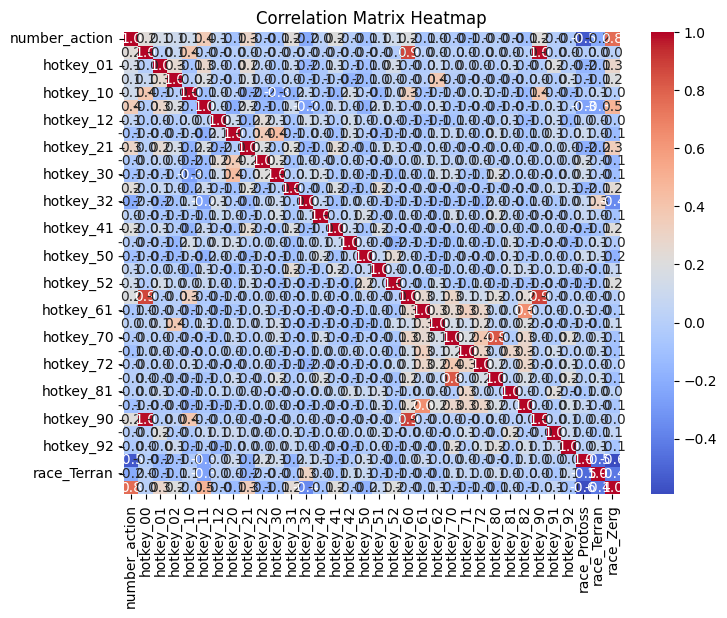

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import make_scorer, f1_score

# Define the parameter distributions for random search
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform random search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, cv=5, scoring='f1_micro', n_iter=10, random_state=42, n_jobs=4)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model on the test set
best_rf_model = random_search.best_estimator_

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 132}


In [49]:
y_pred = best_rf_model.predict(X_valid)

In [50]:
# Compute the F1 score
f1 = f1_score(y_valid, y_pred, average= 'micro')

# Print the F1 score
print(f1)

0.8756137479541735


In [51]:
# Test data preparation

test_data = "/kaggle/input/projetdm-data/TEST.CSV"
### Loop the data lines
with open(test_data, 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]
df_test = pd.read_csv(test_data,header=None, delimiter=",", names=column_names, low_memory=False).astype(str)
df_test.insert(0, '0', 0)
df_test.head()

,0,0,1,2,3,4,5,6,7,8,...,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817
0,0,Zerg,s,s,s,hotkey10,s,hotkey60,s,hotkey00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0,Terran,s,hotkey30,hotkey00,t5,s,hotkey32,s,hotkey32,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0,Protoss,Base,s,s,Base,s,hotkey20,hotkey30,hotkey60,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,0,Zerg,s,s,s,s,hotkey20,s,hotkey40,t5,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,0,Protoss,Base,s,s,Base,s,hotkey50,hotkey30,t5,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [52]:
converted_test_data = df_test.values
output_test_data = extract_features(converted_test_data)

In [53]:
new_test_df = pd.DataFrame(output_test_data, columns=headers)
new_test_df = pd.get_dummies(new_test_df, columns=['race'])
X_test = new_test_df.iloc[:, 1:]  # Features (game information)
predictions = best_rf_model.predict(X_test)
print(predictions)

['http://eu.battle.net/sc2/en/profile/3538115/1/Golden/'
 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/'
 'http://eu.battle.net/sc2/en/profile/3973341/1/yoeFWSan/'
 'http://eu.battle.net/sc2/en/profile/250458/1/VortiX/'
 'http://eu.battle.net/sc2/en/profile/950504/1/Grubby/'
 'http://eu.battle.net/sc2/en/profile/2896854/1/MǂForGG/'
 'http://eu.battle.net/sc2/en/profile/4234852/1/First/'
 'http://eu.battle.net/sc2/en/profile/884897/1/LiquidSnute/'
 'http://eu.battle.net/sc2/en/profile/2526293/1/Krr/'
 'http://eu.battle.net/sc2/en/profile/377576/1/LiquidMaNa/'
 'http://eu.battle.net/sc2/en/profile/284466/1/EGDeMusliM/'
 'http://eu.battle.net/sc2/en/profile/788178/1/Nerchio/'
 'http://eu.battle.net/sc2/en/profile/2101268/1/Stephano/'
 'http://eu.battle.net/sc2/en/profile/3973341/1/yoeFWSan/'
 'http://eu.battle.net/sc2/en/profile/3074362/1/Stardust/'
 'http://eu.battle.net/sc2/en/profile/3538115/1/Golden/'
 'http://eu.battle.net/sc2/en/profile/377576/1/LiquidMaNa/'
 'http://eu.ba

In [54]:
# Convert predictions to a DataFrame
submission_df = pd.DataFrame({'prediction': predictions})
submission_df['RowId'] = submission_df.index + 1 # Adding row IDs starting from 0

# Reorder the columns with 'RowID' as the first column
submission_df = submission_df[['RowId', 'prediction']]


# Save the DataFrame to a CSV file named 'submissions.csv'
submission_df.to_csv('submissions.csv', index=False)  